<a href="https://colab.research.google.com/github/ernesc/masters_thesis_2022/blob/main/data_exploring_TD_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis Valve, time dependant prediction

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#imports
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Activation
from tensorflow.keras.metrics import mean_squared_error
import tensorflow as tf
plt.style.use("ggplot")
from ipywidgets.widgets import interact, Layout

In [ ]:
def extract_data(filename, dataframe):
    
    import pandas as pd
    
    df_filename = pd.read_csv(filename,";")

    df_filename_lukket2 = pd.DataFrame()
    df_filename_lukket2 = df_filename_lukket2.append(df_filename[df_filename["Data Source"].str.contains("LUKKET")])
    df_filename_lukket = pd.DataFrame()
    df_filename_lukket = df_filename_lukket.append(df_filename_lukket2[df_filename_lukket2["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_lukket = df_filename_lukket.rename(columns={"Data Source": "data_source_lukket", 
                                          "Time": "time_lukket", 
                                          "Value": "value_lukket"})
    df_filename_lukket["time_lukket"] = pd.to_datetime(df_filename_lukket["time_lukket"])
    
    
    df_filename_apen1 = pd.DataFrame()
    df_filename_apen1 = df_filename_apen1.append(df_filename[df_filename["Data Source"].str.contains("APEN")])
    df_filename_apen = pd.DataFrame()
    df_filename_apen = df_filename_apen.append(df_filename_apen1[df_filename_apen1["Value"].str.contains("|".join(["On", "Off"]))])
    df_filename_apen = df_filename_apen.rename(columns={"Data Source": "data_source_apen", 
                                      "Time": "time_apen", 
                                      "Value": "value_apen"})
    df_filename_apen["time_apen"] = pd.to_datetime(df_filename_apen["time_apen"])
    
    df_filename_lukket.reset_index(inplace = True)
    df_filename_apen.reset_index(inplace=True)
    df_filename_lukket = df_filename_lukket.drop(columns="index")
    df_filename_apen = df_filename_apen.drop(columns="index")
    
    df_filename_apen['interval'] = pd.to_datetime(df_filename_apen['time_apen'])
    df_filename_lukket['interval'] = pd.to_datetime(df_filename_lukket['time_lukket'])
    
    df_filename_apen.sort_values(by=['interval'])
    df_filename_lukket.sort_values(by=['interval'])
    
    dataframe = pd.merge_asof(df_filename_apen, df_filename_lukket, on='interval', direction="nearest")
    
    
    dataframe["time_diff"] = dataframe["time_apen"] - dataframe["time_lukket"]
    
    dataframe["time_diff_sec"] = dataframe["time_diff"].dt.total_seconds()
    
    dataframe = dataframe.drop(dataframe[dataframe["time_diff_sec"] == 0].index)
    
    return dataframe

In [ ]:

data_2012_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2012.csv", 2012)
data_2013_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2013.csv", 2013)
data_2014_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2014.csv", 2014)
data_2015_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2015.csv", 2015)
data_2016_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2016.csv", 2016)
data_2017_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2017.csv", 2017)
data_2018_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2018.csv", 2018)
data_2019_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2019.csv", 2019)
data_2020_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2020.csv", 2020)
data_2021_1 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg1/2021.csv", 2021)


frames = [data_2012_1, data_2013_1, data_2014_1, data_2015_1, data_2016_1, data_2017_1, data_2018_1, data_2019_1, data_2020_1, data_2021_1]

agg1 = pd.concat(frames)

data_2012_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2012.csv", 2012)
data_2013_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2013.csv", 2013)
data_2014_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2014.csv", 2014)
data_2015_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2015.csv", 2015)
data_2016_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2016.csv", 2016)
data_2017_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2017.csv", 2017)
data_2018_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2018.csv", 2018)
data_2019_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2019.csv", 2019)
data_2020_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2020.csv", 2020)
data_2021_2 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg2/2021.csv", 2021)


frames = [data_2012_2, data_2013_2, data_2014_2, data_2015_2, data_2016_2, data_2017_2, data_2018_2, data_2019_2, data_2020_2, data_2021_2]

agg2 = pd.concat(frames)

data_2012_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2012.csv", 2012)
data_2013_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2013.csv", 2013)
data_2014_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2014.csv", 2014)
data_2015_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2015.csv", 2015)
data_2016_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2016.csv", 2016)
data_2017_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2017.csv", 2017)
data_2018_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2018.csv", 2018)
data_2019_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2019.csv", 2019)
data_2020_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2020.csv", 2020)
data_2021_3 = extract_data("/content/gdrive/My Drive/MASTER_data/nore_1/Agg3/2021.csv", 2021)


frames = [data_2012_3, data_2013_3, data_2014_3, data_2015_3, data_2016_3, data_2017_3, data_2018_3, data_2019_3, data_2020_3, data_2021_3]

agg3 = pd.concat(frames)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: F

In [ ]:
agg1_close = agg1[agg1.time_diff_sec < 0]
agg1_open = agg1[agg1.time_diff_sec > 0]
agg1_open_v2 = agg1_open[['time_apen', 'time_diff_sec']]
agg1_open_v2 = agg1_open_v2.set_index('time_apen')
agg1_close_v2 = agg1_close[['time_lukket', 'time_diff_sec']]
agg1_close_v2 = agg1_close_v2.set_index('time_lukket')

agg2_close = agg2[agg2.time_diff_sec < 0]
agg2_open = agg2[agg2.time_diff_sec > 0]
agg2_open_v2 = agg2_open[['time_apen', 'time_diff_sec']]
agg2_open_v2 = agg2_open_v2.set_index('time_apen')
agg2_close_v2 = agg2_close[['time_lukket', 'time_diff_sec']]
agg2_close_v2 = agg2_close_v2.set_index('time_lukket')

agg3_close = agg3[agg3.time_diff_sec < 0]
agg3_open = agg3[agg3.time_diff_sec > 0]
agg3_open_v2 = agg3_open[['time_apen', 'time_diff_sec']]
agg3_open_v2 = agg3_open_v2.set_index('time_apen')
agg3_close_v2 = agg3_close[['time_lukket', 'time_diff_sec']]
agg3_close_v2 = agg3_close_v2.set_index('time_lukket')

In [ ]:
def remove_outliers(data, column, cutoff):
    data_mean, data_std = np.mean(data[column]), np.std(data[column])
    cut_off = data_std * cutoff
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in data[column] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    outliers_removed = [x for x in data[column] if x >= lower and x <= upper]
    print('Non-outlier obs: %d' % len(outliers_removed))
    
    return outliers

In [ ]:
agg1_close_v2

last=100

In [ ]:
outliers = remove_outliers(agg1_close_v2, 'time_diff_sec', 3)

Identified outliers: 4
Non-outlier obs: 348


In [ ]:
agg1_close_v2 = agg1_close_v2[~agg1_close_v2['time_diff_sec'].isin(outliers)]

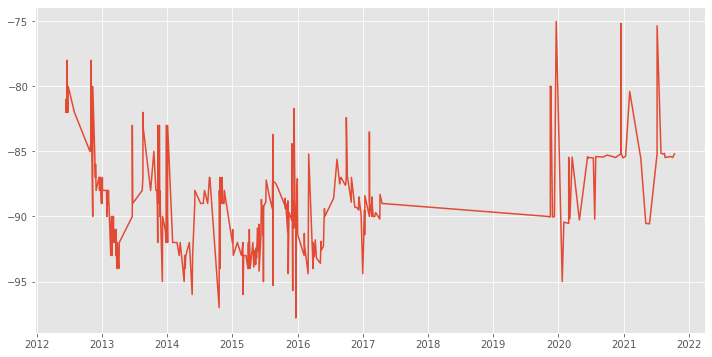

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(agg1_close_v2)

In [ ]:
outliers = remove_outliers(agg2_close_v2, 'time_diff_sec', 3)

Identified outliers: 3
Non-outlier obs: 305


In [ ]:
agg2_close_v2 = agg2_close_v2[~agg2_close_v2['time_diff_sec'].isin(outliers)]

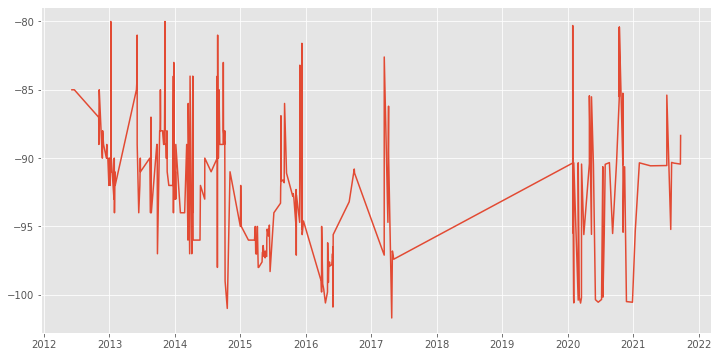

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(agg2_close_v2)

In [ ]:
outliers = remove_outliers(agg3_close_v2, 'time_diff_sec', 2)

Identified outliers: 24
Non-outlier obs: 416


In [ ]:
agg3_close_v2 = agg3_close_v2[~agg3_close_v2['time_diff_sec'].isin(outliers)]

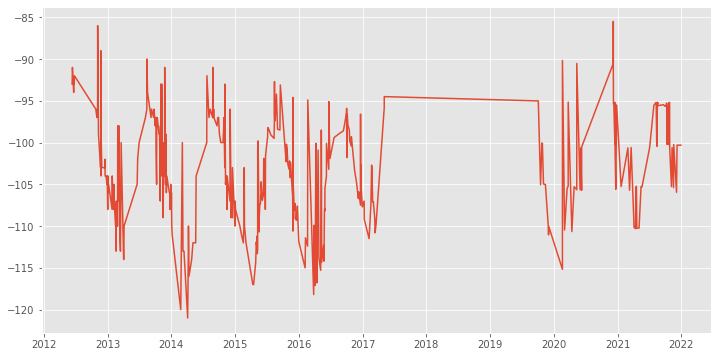

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(agg3_close_v2)

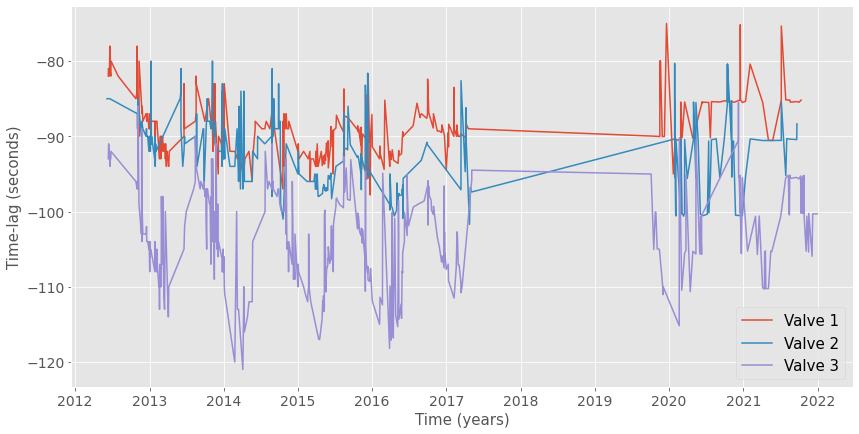

In [ ]:
plt.figure(figsize=(14,7))

plt.plot(agg1_close_v2, label="Valve 1")
plt.plot(agg2_close_v2, label='Valve 2')
plt.plot(agg3_close_v2, label='Valve 3')
plt.legend(fontsize=13)
plt.xlabel('Time (years)', fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Time-lag (seconds)', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('/content/gdrive/My Drive/MASTER_data/valve_analysis.png')

In [ ]:
dataset = data.values
train = dataset[0:len(data)-last,:]
valid = dataset[len(data)-last:,:]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
x_train, y_train = [], []
for i in range(last, len(train)):
    x_train.append(scaled_data[i-last:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

cp = ModelCheckpoint('modelLSTM/', save_best_only=True, monitor='val_root_mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

model = Sequential()
model.add(LSTM(units=100, activation='relu', 
               return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
history = model.fit(x_train, y_train, validation_split=.3, epochs=50, batch_size=1, verbose=1, callbacks=[cp, early_stopping])




Epoch 1/50
102/103 [============================>.] - ETA: 0s - loss: 0.0437 - root_mean_squared_error: 0.2092INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 11s 82ms/step - loss: 0.0434 - root_mean_squared_error: 0.2082 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1665
Epoch 2/50
103/103 [==============================] - ETA: 0s - loss: 0.0188 - root_mean_squared_error: 0.1371INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 8s 79ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 3/50
103/103 [==============================] - 5s 46ms/step - loss: 0.0220 - root_mean_squared_error: 0.1485 - val_loss: 0.0272 - val_root_mean_squared_error: 0.1648
Epoch 4/50
103/103 [==============================] - 5s 46ms/step - loss: 0.0188 - root_mean_squared_error: 0.1370 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1584
Epoch 5/50
103/103 [==============================] - ETA: 0s - loss: 0.0191 - root_mean_squared_error: 0.1384INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 8s 79ms/step - loss: 0.0191 - root_mean_squared_error: 0.1384 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1580
Epoch 6/50
103/103 [==============================] - 5s 46ms/step - loss: 0.0187 - root_mean_squared_error: 0.1366 - val_loss: 0.0277 - val_root_mean_squared_error: 0.1664
Epoch 7/50
103/103 [==============================] - 5s 46ms/step - loss: 0.0204 - root_mean_squared_error: 0.1430 - val_loss: 0.0255 - val_root_mean_squared_error: 0.1597
Epoch 8/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0191 - root_mean_squared_error: 0.1381 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1600
Epoch 9/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0191 - root_mean_squared_error: 0.1381 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1696
Epoch 10/50
102/103 [============================>.] - ETA: 0s - loss: 0.0185 - root_mean_squared_error: 0.1360INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 9s 83ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1573
Epoch 11/50
103/103 [==============================] - ETA: 0s - loss: 0.0186 - root_mean_squared_error: 0.1365INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 9s 85ms/step - loss: 0.0186 - root_mean_squared_error: 0.1365 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1567
Epoch 12/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1658
Epoch 13/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0182 - root_mean_squared_error: 0.1347 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1595
Epoch 14/50
103/103 [==============================] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.1343INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 8s 81ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 0.0242 - val_root_mean_squared_error: 0.1557
Epoch 15/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0186 - root_mean_squared_error: 0.1362 - val_loss: 0.0245 - val_root_mean_squared_error: 0.1566
Epoch 16/50
102/103 [============================>.] - ETA: 0s - loss: 0.0176 - root_mean_squared_error: 0.1326INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 8s 80ms/step - loss: 0.0174 - root_mean_squared_error: 0.1319 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1551
Epoch 17/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0178 - root_mean_squared_error: 0.1333 - val_loss: 0.0247 - val_root_mean_squared_error: 0.1572
Epoch 18/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0173 - root_mean_squared_error: 0.1315 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1552
Epoch 19/50
102/103 [============================>.] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1322INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 9s 88ms/step - loss: 0.0178 - root_mean_squared_error: 0.1336 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1549
Epoch 20/50
102/103 [============================>.] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1332INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 8s 82ms/step - loss: 0.0176 - root_mean_squared_error: 0.1328 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1532
Epoch 21/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0161 - root_mean_squared_error: 0.1268 - val_loss: 0.0251 - val_root_mean_squared_error: 0.1583
Epoch 22/50
102/103 [============================>.] - ETA: 0s - loss: 0.0163 - root_mean_squared_error: 0.1275INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 9s 87ms/step - loss: 0.0162 - root_mean_squared_error: 0.1271 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1530
Epoch 23/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0167 - root_mean_squared_error: 0.1290 - val_loss: 0.0236 - val_root_mean_squared_error: 0.1535
Epoch 24/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0160 - root_mean_squared_error: 0.1266 - val_loss: 0.0240 - val_root_mean_squared_error: 0.1549
Epoch 25/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0154 - root_mean_squared_error: 0.1243 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1580
Epoch 26/50
103/103 [==============================] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1257INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 8s 82ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1508
Epoch 27/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0153 - root_mean_squared_error: 0.1238 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1623
Epoch 28/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0157 - root_mean_squared_error: 0.1255 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1510
Epoch 29/50
103/103 [==============================] - 5s 46ms/step - loss: 0.0152 - root_mean_squared_error: 0.1234 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 30/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1514
Epoch 31/50
102/103 [============================>.] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.1230INFO:tensorflow:Assets written 

INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 8s 80ms/step - loss: 0.0150 - root_mean_squared_error: 0.1224 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1492
Epoch 32/50
103/103 [==============================] - ETA: 0s - loss: 0.0152 - root_mean_squared_error: 0.1234INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 9s 85ms/step - loss: 0.0152 - root_mean_squared_error: 0.1234 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1492
Epoch 33/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0148 - root_mean_squared_error: 0.1217 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1629
Epoch 34/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - val_loss: 0.0238 - val_root_mean_squared_error: 0.1544
Epoch 35/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1557
Epoch 36/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1502
Epoch 37/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0224 - val_

INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 8s 82ms/step - loss: 0.0138 - root_mean_squared_error: 0.1176 - val_loss: 0.0221 - val_root_mean_squared_error: 0.1487
Epoch 47/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0130 - root_mean_squared_error: 0.1142 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
Epoch 48/50
103/103 [==============================] - ETA: 0s - loss: 0.0131 - root_mean_squared_error: 0.1145INFO:tensorflow:Assets written to: modelLSTM/assets


INFO:tensorflow:Assets written to: modelLSTM/assets


103/103 [==============================] - 9s 86ms/step - loss: 0.0131 - root_mean_squared_error: 0.1145 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1477
Epoch 49/50
103/103 [==============================] - 5s 48ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493
Epoch 50/50
103/103 [==============================] - 5s 47ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0228 - val_root_mean_squared_error: 0.1511


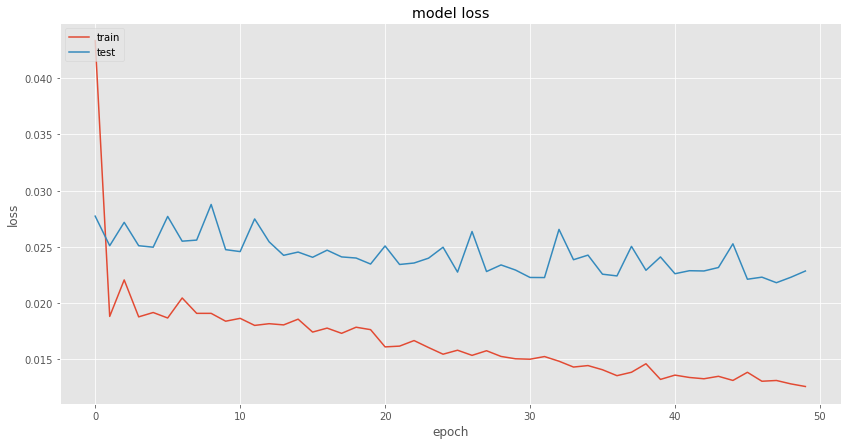

In [ ]:
plt.figure(figsize = (14,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('modelLSTM/')

inputs = data[len(data) - len(valid) - last:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(last,inputs.shape[0]):
    X_test.append(inputs[i-last:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
time_diff = model1.predict(X_test)
time_diff = scaler.inverse_transform(time_diff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


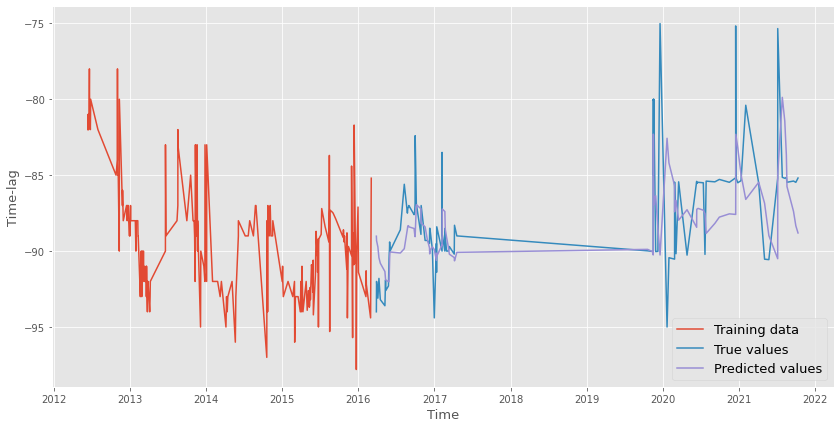

In [ ]:
train = data[:len(data)-last]
valid = data[len(data)-last:]
valid['Predictions'] = time_diff
plt.figure(figsize=(14,7))
plt.plot(train['time_diff_sec'], label='Training data')
plt.plot(valid['time_diff_sec'], label='True values')
plt.plot(valid['Predictions'], label='Predicted values')
plt.xlabel("Time", fontsize=13)
plt.ylabel('Time-lag', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('/content/gdrive/My Drive/MASTER_data/lstm_model_closed.png')

In [ ]:
print(f'RMSE {np.sqrt(mean_squared_error(valid.time_diff_sec, valid.Predictions))}')

RMSE 3.9309325218200684


# ARIMA

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.7 MB/s 
     |████████████████████████████████| 9.8 MB 40.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


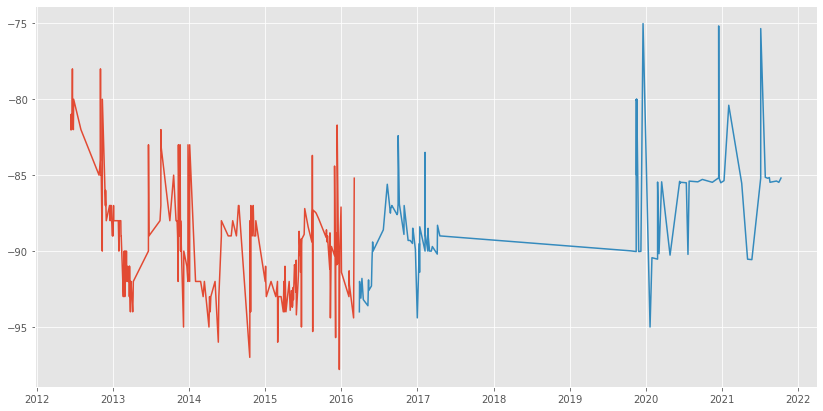

In [ ]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)
train_ = data[:len(data)-last]
test_ = data[len(data)-last:]
plt.figure(figsize=(14,7))
plt.plot(train_)
plt.plot(test_)

In [ ]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_,start_p=0, d=1, start_q=0, 
                          max_p=10, max_d=10, max_q=10, start_P=0, 
                          D=1, start_Q=0, max_P=15, max_D=15,
                          max_Q=15, m=12,
                         seasonal=True, 
                         error_action='warn', trace=True,
                         supress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1382.090, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1266.540, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1344.772, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1246.902, Time=1.05 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1225.254, Time=2.02 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1221.993, Time=4.21 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1221.138, Time=8.96 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=1212.760, Time=14.92 sec
 ARIMA(1,1,0)(7,1,0)[12]             : AIC=1210.918, Time=10.22 sec
 ARIMA(1,1,0)(8,1,0)[12]             : AIC=1212.875, Time=12.38 sec
 ARIMA(1,1,0)(7,1,1)[12]             : AIC=inf, Time=36.78 sec
 ARIMA(1,1,0)(6,1,1)[12]             : AIC=1210.547, Time=11.80 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=1211.565, Time=8.43 sec
 ARIMA(1,1,0)(6,1,2)[12]

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  248
Model:             SARIMAX(2, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -588.815
Date:                                 Wed, 06 Apr 2022   AIC                           1189.630
Time:                                         13:14:40   BIC                           1210.387
Sample:                                              0   HQIC                          1197.998
                                                 - 248                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3171      0.094      3.383      0.001       0.133       0.501
ar.L2          0.1401      0.085      1.647      0.100      -0.027       0.307
ma.L1         -0.8591      0.073    -11.752      0.000      -1.002      -0.716
ma.S.L12      -1.0212      0.066    -15.543      0.000      -1.150      -0.892
ma.S.L24       0.1332      0.076      1.758      0.079      -0.015       0.282
sigma2         8.0230      0.673     11.919      0.000       6.704       9.342
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                22.80
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                            -0.41
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods=last), index=test_.index)
prediction.colums = ['predicted_values']
prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0
time_lukket,
2016-03-28 00:00:55.400009,-88.863770
2016-03-28 22:49:07.500000,-88.382535
2016-04-04 07:04:39.000000,-88.414286
2016-04-09 07:51:39.400009,-90.290580
2016-04-16 00:07:29.200012,-89.611060
...,...
2021-08-17 00:04:27.781006,-90.663300
2021-08-20 00:12:03.427002,-90.603545
2021-09-20 08:04:36.039001,-90.285471


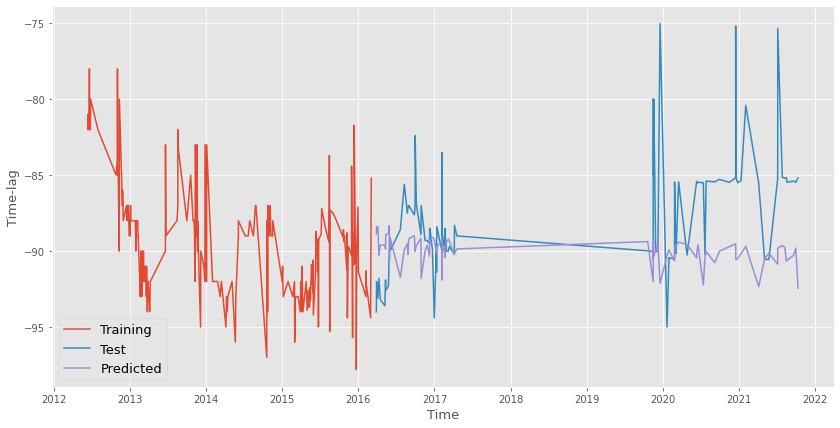

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(train, label='Training')
plt.plot(test_, label='Test')
plt.plot(prediction, label='Predicted')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Time-lag', fontsize=13)
plt.legend(fontsize=13)
plt.savefig('/content/gdrive/My Drive/MASTER_data/arimamodel_agg1_closed.png')
plt.show()

In [ ]:
print(f'RMSE {np.mean(np.sqrt(mean_squared_error(test_, prediction)))}')

RMSE 3.873785399503198
